In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

app = pd.read_csv(r'C:\Users\lorin\Desktop\DA Course Homeworks\Chapter 4\Lesson 6\applications.csv')
ind = pd.read_csv(r"C:\Users\lorin\Desktop\DA Course Homeworks\Chapter 4\Lesson 6\industries.csv")
print(app.head())
print(ind.head())

#1. Elimina duplicatele din coloana applicant_id
app = app.drop_duplicates(subset='applicant_id')
# app

#1: In campul External Rating completeaza valorile lipsa cu zero
app['External Rating'] = app['External Rating'].fillna(0)
# app

#1: In campul Education Level completeaza valorile lipsa cu 'Average'
app['Education level'] = app['Education level'].fillna('Average')
# app



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lorin\\Desktop\\DA Course Homeworks\\Chapter 4\\Lesson 6\\applications.csv'

In [3]:
#2: Adaugă datele din fișierul industries.csv în acest DataFrame, respectiv, evaluările industriilor
ind = ind.rename(columns={'Score' : 'Industry Score'})
print(ind.head())
df = pd.merge(app, ind)
print(df.head())



                       Industry  Industry Score
0                    Blockchain               0
1  Public services / Government              20
2          Adtech / Advertising              10
3                       Telecom              15
4                    Automotive              15
            Applied at   Amount  Age  Gender                      Industry  \
0  11.30.2022 10:26:37  12000.0   29    Male                    Blockchain   
1  11.30.2022 10:26:39      NaN   36    Male  Public services / Government   
2  11.30.2022 10:26:58   7500.0   34    Male          Adtech / Advertising   
3  11.30.2022 10:27:31   1500.0   23  Female                       Telecom   
4  11.30.2022 10:27:34   8400.0   33  Female                    Automotive   

  Marital status  External Rating  \
0          Other              8.0   
1         Single              3.0   
2         Single              4.0   
3         Single              0.0   
4         Single              6.0   

                    

In [4]:
#3: Calculează evaluarea cererii conform următoarelor condiții:
# Evaluarea trebuie să fie un număr între 0 și 100;
# Evaluarea este suma scorurilor pentru cele 6 criterii;
# Evaluarea este zero dacă nu există valoarea Amount sau dacă External Rating este zero.
# Din ce constă evaluarea:
# Dacă vârsta aplicantului este între 35 și 55 de ani, se adaugă 20 de puncte la evaluare.
# Dacă aplicația a fost depusă în weekend, se adaugă 20 de puncte la evaluare.
# Dacă aplicantul este căsătorit, se adaugă 20 de puncte la evaluare.
# Dacă aplicantul este localizat în Kyiv sau în regiune, se adaugă 10 puncte la evaluare.
# Valoarea Score din tabelul industries.csv este de asemenea adăugată la cerere (și variază între 0 și 20 de puncte).
# Dacă External Rating este mai mare sau egal cu 7, se adaugă 20 de puncte la evaluare.
# Dacă External Rating este mai mic sau egal cu 2, se scad 20 de puncte din evaluare.
df['Age'] = df['Age'].astype(int)
df['Applied at'] = pd.to_datetime(df['Applied at'], format='mixed')
df['Applied on day'] = df['Applied at'].dt.day_name()
#df
age = ((df['Age'] >= 35 ) & (df['Age'] <= 55 )) * 20
day = ~df['Applied on day'].isin(['Saturday' , 'Sunday']) * 10
marital = (df['Marital status'] == 'Married') * 20
location = (df['Location'] == 'Kyiv or region') * 10
industry = df['Industry Score']
positive_rating = (df['External Rating'] >= 7) * 20
negaitive_rating = (df['External Rating'] <= 2) * -20
df['Final Score'] = age + day + marital + location + industry + positive_rating + negaitive_rating
df['Final Score'] = df['Final Score'] * ~(df['External Rating'] == 0) * ~df['Amount'].isna()
df.head()



,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Industry Score,Applied on day,Final Score
0,2022-11-30 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,Wednesday,30
1,2022-11-30 10:26:39,NaN,36,Male,Public services / Government,Single,3.0,"Higher Degree (bachelor's, specialist's, maste...",NaN,63dfcf8e6904186650d6814279fbe42f,20,Wednesday,0
2,2022-11-30 10:26:58,7500.0,34,Male,Adtech / Advertising,Single,4.0,"Higher Degree (bachelor's, specialist's, maste...","Poland, Warsaw",10dbafaeb46c09e96b6987c03bbb3498,10,Wednesday,20
3,2022-11-30 10:27:31,1500.0,23,Female,Telecom,Single,0.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",5847ac62cc9eac5e323c2517dcc91ad1,15,Wednesday,0
4,2022-11-30 10:27:34,8400.0,33,Female,Automotive,Single,6.0,"Higher Degree (bachelor's, specialist's, maste...","Bulgaria, Sofia",5d21f3795b50de8e8f8f8d5f48b754f3,15,Wednesday,25


In [5]:
#4:În tabelul rezultat, lasă doar cererile cu o evaluare mai mare decât zero, aceste cereri vor fi considerate acceptate.
df = df[df['Final Score'] > 0]
print(df.head())



           Applied at   Amount  Age  Gender              Industry  \
0 2022-11-30 10:26:37  12000.0   29    Male            Blockchain   
2 2022-11-30 10:26:58   7500.0   34    Male  Adtech / Advertising   
4 2022-11-30 10:27:34   8400.0   33  Female            Automotive   
5 2022-11-30 10:27:38  16500.0   31    Male            E-commerce   
6 2022-11-30 10:27:42   4200.0   30    Male                 Media   

  Marital status  External Rating  \
0          Other              8.0   
2         Single              4.0   
4         Single              6.0   
5         Single              8.0   
6        Married              1.0   

                                     Education level            Location  \
0  Higher Degree (bachelor's, specialist's, maste...       Spain, Madrid   
2  Higher Degree (bachelor's, specialist's, maste...      Poland, Warsaw   
4  Higher Degree (bachelor's, specialist's, maste...     Bulgaria, Sofia   
5  Higher Degree (bachelor's, specialist's, maste...      

            Amount  Age  External Rating  Industry Score  Final Score
Applied at                                                           
2022-11-27   10316   30                5              13           40
2022-12-04    9357   29                5              13           38
2022-12-11    9227   29                5              13           38
2022-12-18    8718   29                5              13           38
2022-12-25    8762   29                5              13           39


C:\Users\lorin\AppData\Local\Temp\ipykernel_10584\1962993783.py:6: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dfg = dfg.resample('w', label='left').mean(numeric_only=True).astype(int)


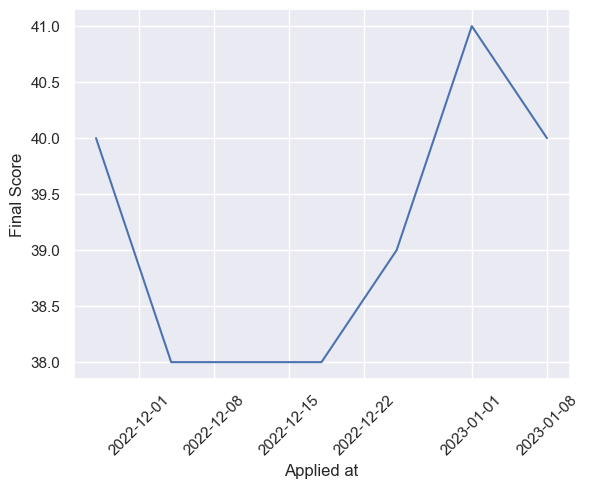

In [8]:
#5: Grupează datele din tabelul rezultat în funcție de săptămâna depunerii cererii și afișează evaluarea medie a cererilor acceptate în fiecare săptămână pe grafic.
import matplotlib.pyplot as plt
import seaborn as sns

dfg = df.set_index('Applied at')
dfg = dfg.resample('w', label='left').mean(numeric_only=True).astype(int)
print(dfg.head())

# Reset the index to access 'Applied at' as a column
dfg = dfg.reset_index()

# Graph of the average evaluation of accepted applications per week
sns.set_theme()
sns.lineplot(data=dfg, x='Applied at', y='Final Score')

# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.show()